# 0. Setup

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('output/processed_data/1709976233_wrangled_loan_data.csv')

# Section 1: Information for Strategic Stakeholders

## 1.1 Distribution of Loan Amounts
This plot shows the distribution of loan amounts, helping to understand the typical loan size. As we can se the distribution is right-skewed, with a mean loan amount of approximately 15,000 and a median loan amount of 14,000. This means that the majority of the loan amounts are rather small, with a few larger loans.

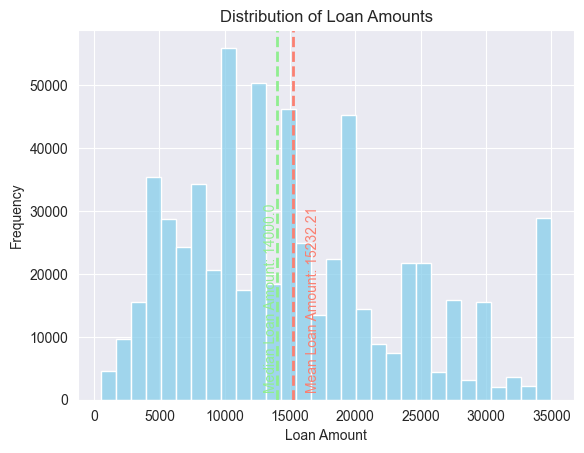

In [2]:
sns.histplot(data=data, x="loan_amnt", bins=30, color='skyblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.axvline(data['loan_amnt'].mean(), color='salmon', linestyle='--', linewidth=2)
plt.text(data['loan_amnt'].mean() + 1000, 1600, f'Mean Loan Amount: {round(data["loan_amnt"].mean(), 2)}', rotation=90, color='salmon')
plt.axvline(data['loan_amnt'].median(), color='lightgreen', linestyle='--', linewidth=2)
plt.text(data['loan_amnt'].median() - 1000, 1600, f'Median Loan Amount: {round(data["loan_amnt"].median(), 2)}', rotation=90, color='lightgreen')
plt.show()

## 1.2 Loan Status Frequency
Understanding the distribution of loan statuses can inform about the portfolio's health. The majority of loans are in the current category. This is a positive sign, indicating that most borrowers are making timely payments. Only a small proportion of loans are Late or in the Grace Period. Very few loans are in Default which is a positive sign.

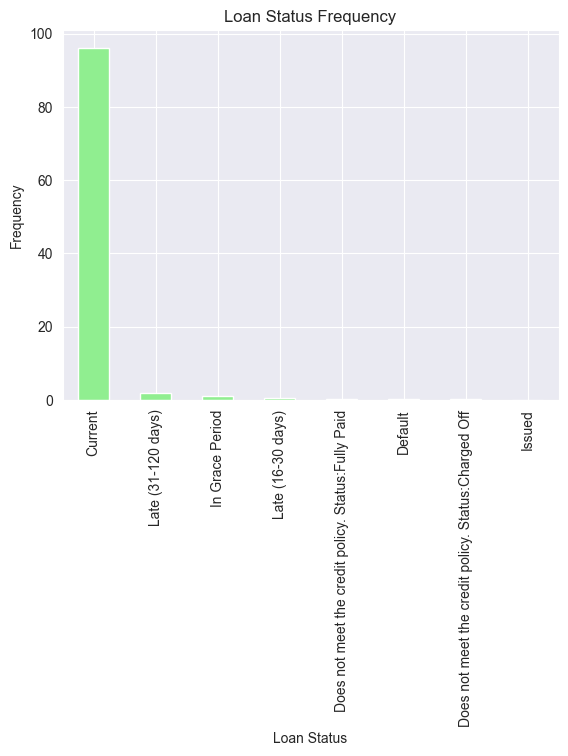

In [22]:
(data['loan_status'].value_counts(normalize=True) * 100).plot(kind='bar', color='lightgreen')
plt.title('Loan Status Frequency')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## 1.3 Grade Distribution
The Grade distribution can provide insights into the risk profile of the portfolio. A portfolio with a higher proportion of higher grades (e.g. Grade A) is generally considered less risky, then a portfolio with a high proportion of lower grade borrowers (e.g. Grade G). The plot shows that the majority of loans are of grade B or C, which is a positive sign.

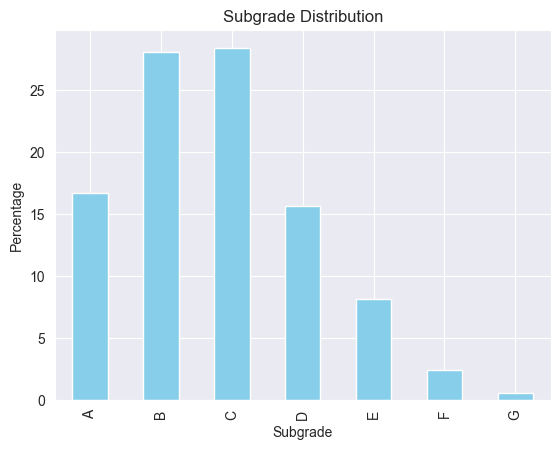

In [21]:
(data['grade'].value_counts(normalize=True).sort_index() * 100).plot(kind='bar', color='skyblue')
plt.title('Subgrade Distribution')
plt.xlabel('Subgrade')
plt.ylabel('Percentage')
plt.show()

# 2. Information for Analyst Stakeholders

# 2.1 Loan Amount by Grade
TODO: Add description

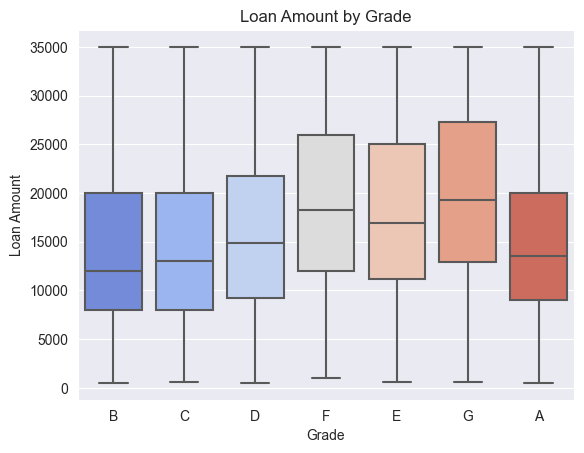

In [24]:
# Creat a boxplot of loan amount by grade
sns.boxplot(data=data, x='grade', y='loan_amnt', palette='coolwarm')
plt.title('Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

# 2.2 Annual Income by Loan Amount/Grade Distribution
TODO: Add description

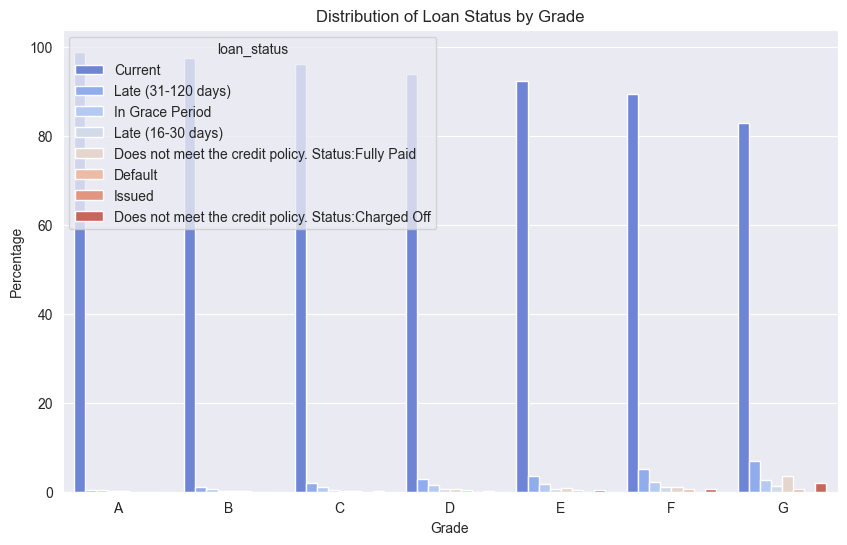

In [30]:
# Calculate the percentages
loan_status_percentages = (data.groupby('grade')['loan_status'].value_counts(normalize=True) * 100).rename('percentage').reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=loan_status_percentages, x='grade', y='percentage', hue='loan_status', palette='coolwarm')
plt.title('Distribution of Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.show()

# 2.3 Correlation Heatmap
TODO: Add description
Exploring relationships between numerical features can uncover insights for further analysis.

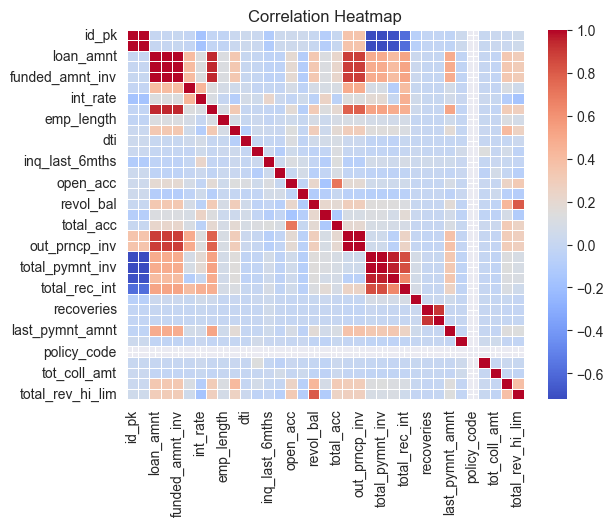

In [6]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. Information for Operational Stakeholders

## 3.1 Missing Values per Column
The plot highlights the columns with missing values. As can be seen the **emp_title** column has the most missing values. This information can be used to inform data collection strategies, that might prevent missing values in the future.

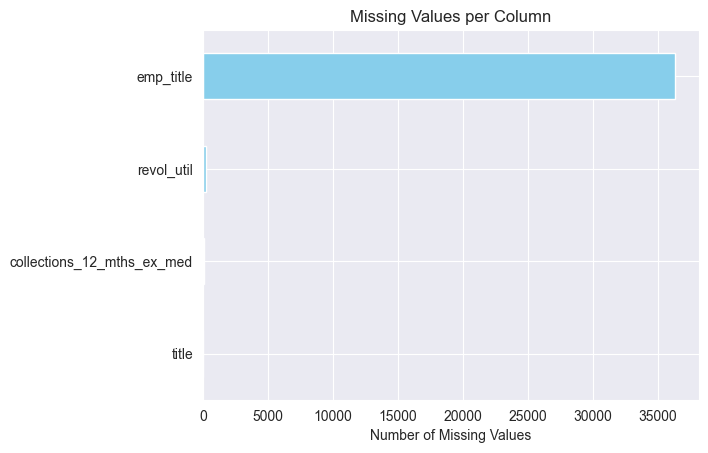

In [26]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values().plot(kind='barh', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.show()

## 3.2 Income Distribution


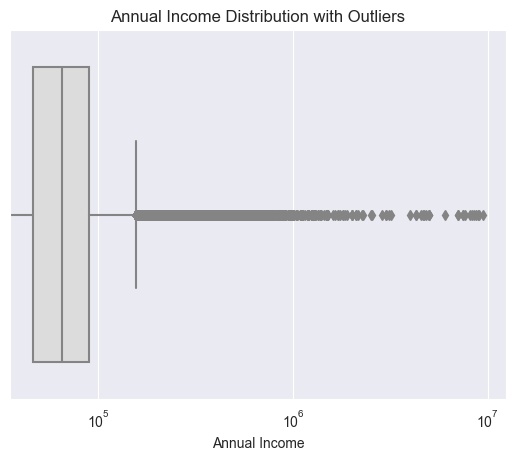

In [36]:
sns.boxplot(data=data, x='annual_inc', palette='coolwarm')
plt.title('Annual Income Distribution with Outliers')
plt.xlabel('Annual Income')
plt.xscale('log')
plt.show()